In [1]:
from train import *

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Current device:", device)

Current device: cuda


In [3]:
epochs = 2000
lr = 0.001

loss_i, loss_b, loss_f, loss, model = train(epochs=epochs, lr=lr)
loss_i_2, loss_b_2, loss_f_2, loss_2, model_2 = train(epochs=epochs, lr=lr, load=True)

Current device: cuda
Epoch 100 | Loss_I: 0.4864 | Loss_B: 0.0333 | Loss_F: 0.0017
Epoch 200 | Loss_I: 0.4733 | Loss_B: 0.0172 | Loss_F: 0.0011
Epoch 300 | Loss_I: 0.4664 | Loss_B: 0.0119 | Loss_F: 0.0011
Epoch 400 | Loss_I: 0.4608 | Loss_B: 0.0092 | Loss_F: 0.0013
Epoch 500 | Loss_I: 0.4555 | Loss_B: 0.0077 | Loss_F: 0.0017
Epoch 600 | Loss_I: 0.4499 | Loss_B: 0.0067 | Loss_F: 0.0022
Epoch 700 | Loss_I: 0.4428 | Loss_B: 0.0060 | Loss_F: 0.0029
Epoch 800 | Loss_I: 0.4318 | Loss_B: 0.0055 | Loss_F: 0.0035
Epoch 900 | Loss_I: 0.4120 | Loss_B: 0.0050 | Loss_F: 0.0044
Epoch 1000 | Loss_I: 0.3847 | Loss_B: 0.0046 | Loss_F: 0.0075
Epoch 1100 | Loss_I: 0.3593 | Loss_B: 0.0043 | Loss_F: 0.0117
Epoch 1200 | Loss_I: 0.3378 | Loss_B: 0.0040 | Loss_F: 0.0154
Epoch 1300 | Loss_I: 0.3195 | Loss_B: 0.0038 | Loss_F: 0.0187
Epoch 1400 | Loss_I: 0.3037 | Loss_B: 0.0035 | Loss_F: 0.0215
Epoch 1500 | Loss_I: 0.2898 | Loss_B: 0.0033 | Loss_F: 0.0240
Epoch 1600 | Loss_I: 0.2776 | Loss_B: 0.0032 | Loss_F: 0.0

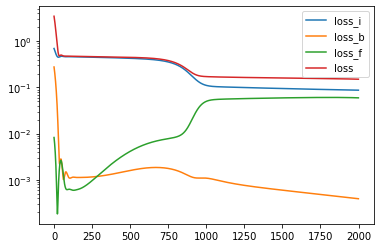

In [4]:

plt.plot(np.arange(len(loss_i)), loss_i, label='loss_i')
plt.plot(np.arange(len(loss_b)), loss_b, label='loss_b')
plt.plot(np.arange(len(loss_f)), loss_f, label='loss_f')
plt.plot(np.arange(len(loss)), loss, label='loss')
plt.yscale('log')
plt.legend()
plt.show()

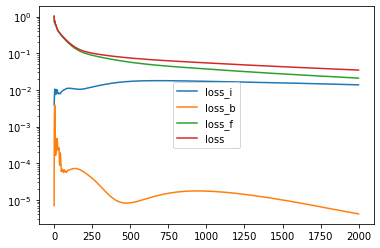

In [12]:
plt.cla()
plt.plot(np.arange(len(loss_i_2)), loss_i_2, label='loss_i')
plt.plot(np.arange(len(loss_b_2)), loss_b_2, label='loss_b')
plt.plot(np.arange(len(loss_f_2)), loss_f_2, label='loss_f')
plt.plot(np.arange(len(loss_2)), loss_2, label='loss')
plt.yscale('log')
plt.legend()
plt.show()

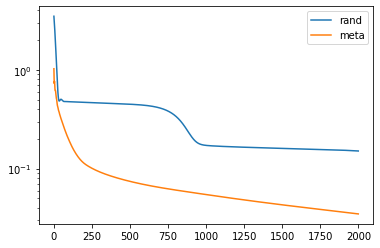

In [13]:
plt.cla()
plt.plot(np.arange(len(loss)), loss, label='rand')
plt.plot(np.arange(len(loss_2)), loss_2, label='meta')
plt.yscale('log')
plt.legend()
plt.show()

In [17]:
test_x = np.linspace(-1, 1, num=400).reshape(-1, 1)
test_t = np.linspace(0, 1, num=400).reshape(-1, 1)
X, T = np.meshgrid(test_x, test_t)
test_in = np.concatenate((X.flatten().reshape(-1, 1), T.flatten().reshape(-1, 1)), axis=1)
test_in = torch.Tensor(test_in).to(device)
test_u = model_2(test_in)

In [18]:
test_u

tensor([[ 0.0057],
        [ 0.0213],
        [ 0.0369],
        ...,
        [-0.0071],
        [-0.0034],
        [ 0.0004]], device='cuda:0', grad_fn=<TanhBackward0>)

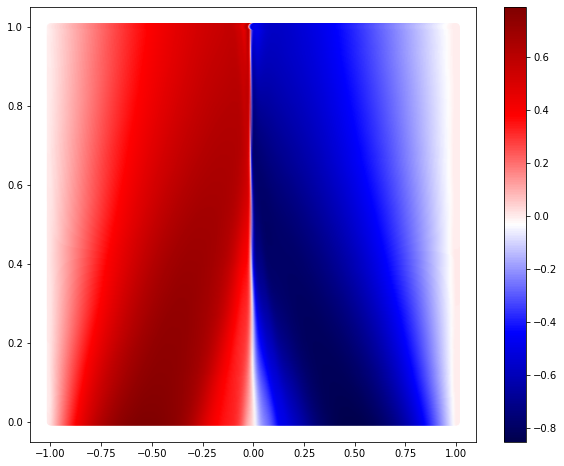

In [19]:
C = test_u.cpu().detach().numpy()
plt.figure(figsize=(10, 8))
plt.scatter(X, T, c=C, cmap='seismic')
plt.colorbar()

